<a href="https://colab.research.google.com/github/anish-maddipatla/Financial-Risk-Forecasting/blob/main/FRAM_SEM_II_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install arch statsmodels numpy pandas matplotlib
from arch import arch_model
from statsmodels.tsa.stattools import adfuller
from scipy.stats import norm
# Replace with actual start and end dates based on birthdays
start_date = "2020-02-17"
end_date = "2025-04-04"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 11.9 MB/s eta 0:00:00


Step 1,2: Asset Selection & Data Download, Data Cleaning & Pre-processing

[*********************100%***********************]  5 of 5 completed
<ipython-input-3-99c244c79cdf>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Ticker          BEML.NS         GC=F      INFY.NS   USDINR=X         ^NSEI
Date                                                                      
2020-02-17   744.745850          NaN   702.416443  71.514801  12045.799805
2020-02-18   710.310730  1600.000000   709.712463  71.349197  11992.500000
2020-02-19   709.703857  1607.500000   712.203613  71.574997  12125.900391
2020-02-20   708.368469  1616.599976   709.134094  71.827499  12080.849609
2020-02-21   708.368469  1644.599976   709.134094  72.110001  12080.849609
...                 ...          ...          ...        ...           ...
2025-03-28  3219.550049  3086.500000  1570.650024  85.694901  23519.349609
2025-03-31  3219.550049  3122.800049  1570.650024  85.538803  23519.349609
2025-04-01  3169.899902  3118.899902  1526.500000  85.468102  23165.699219
2025-04-02  3124.800049  3139.899902  1550.150024  85.610100  23332.349609
2025-04-03  3154.449951  3097.000000  1496.500000  85.651199  23250.099609

[1341 rows x 5 columns]


<Figure size 1200x600 with 0 Axes>

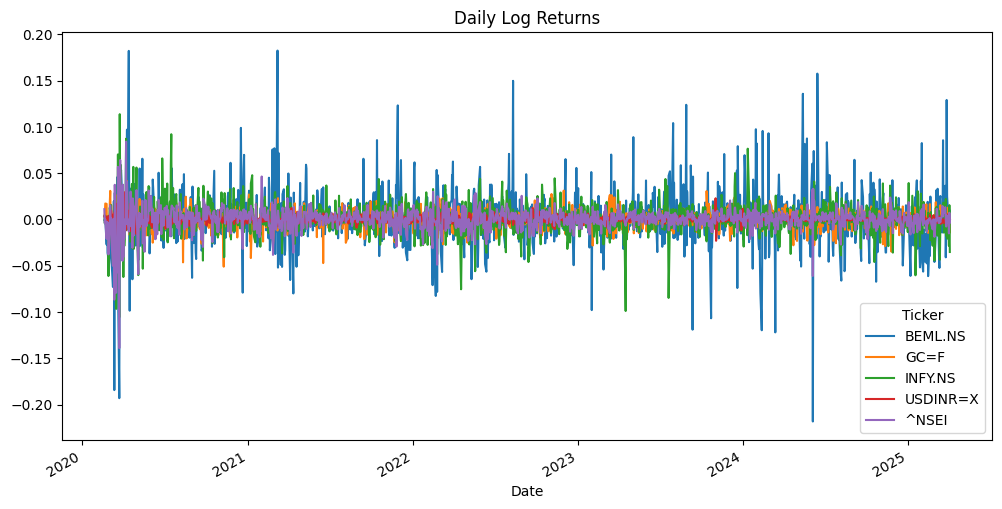

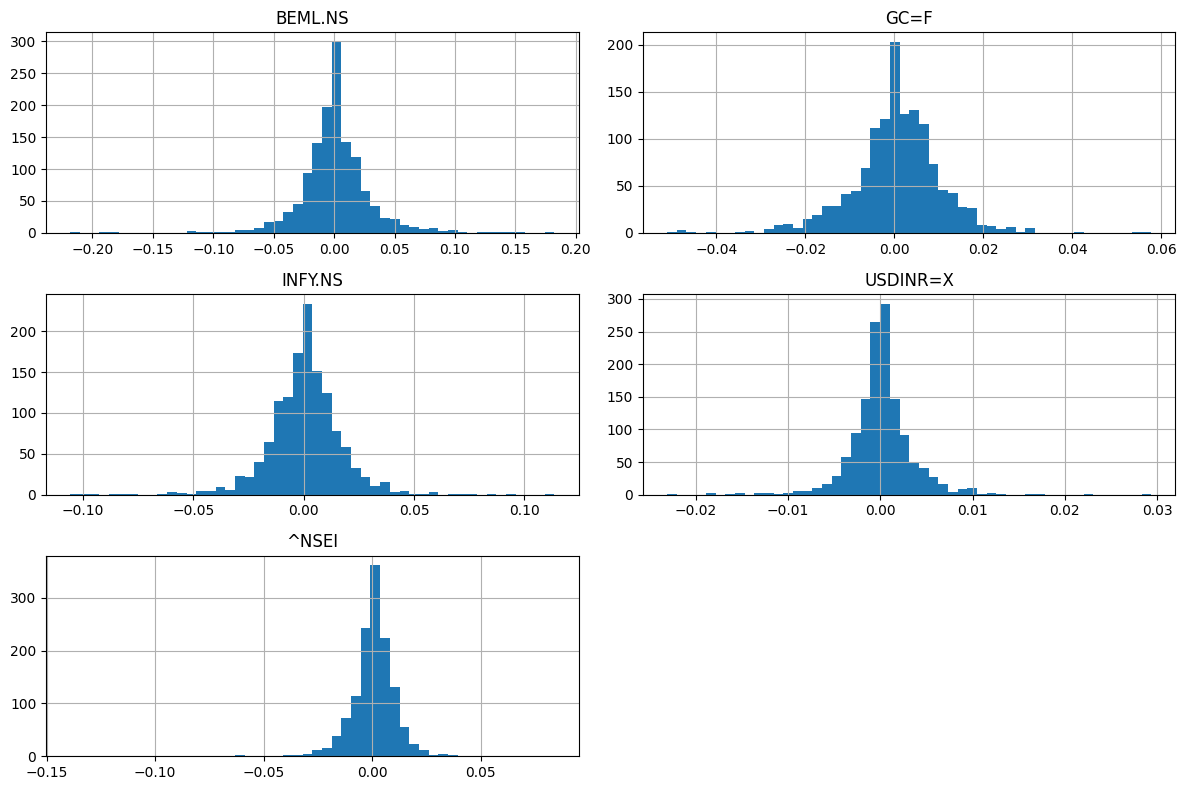

Summary Statistics:
           count      mean       std       min       25%       50%       75%  \
Ticker                                                                         
BEML.NS   1339.0  0.001113  0.029983 -0.218285 -0.011979  0.000000  0.013558   
GC=F      1339.0  0.000493  0.010068 -0.051069 -0.004195  0.000459  0.006163   
INFY.NS   1339.0  0.000557  0.017208 -0.105797 -0.008000  0.000000  0.009189   
USDINR=X  1339.0  0.000136  0.003439 -0.023115 -0.001339  0.000026  0.001396   
^NSEI     1339.0  0.000494  0.011722 -0.139038 -0.003812  0.000340  0.006428   

               max  skewness   kurtosis  
Ticker                                   
BEML.NS   0.182322  0.086172   8.900645  
GC=F      0.057775 -0.323566   3.742456  
INFY.NS   0.113627 -0.202267   6.807980  
USDINR=X  0.029369  0.337008  10.254146  
^NSEI     0.084003 -1.798639  23.440694  


In [ ]:
start_date = "2020-02-17"
end_date = "2025-04-04"

tickers = ['INFY.NS', '^NSEI', 'USDINR=X', 'BEML.NS', 'GC=F']
data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Drop rows with all missing values
data.dropna(how='all', inplace=True)

# Forward fill missing data
data.fillna(method='ffill', inplace=True)
print(data)
# calculate returns
returns = data.pct_change().dropna()
# Calculate log returns
log_returns = np.log(data / data.shift(1)).dropna()
print(log_returns)
# Summary statistics
summary_stats = log_returns.describe().T
summary_stats['skewness'] = log_returns.skew()
summary_stats['kurtosis'] = log_returns.kurtosis()

# Visualizations
plt.figure(figsize=(12, 6))
log_returns.plot(title='Daily Log Returns', figsize=(12, 6))

# Histograms
log_returns.hist(bins=50, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Print summary
print("Summary Statistics:")
print(summary_stats)

Step 3: Volatility Modelling & Forecasting

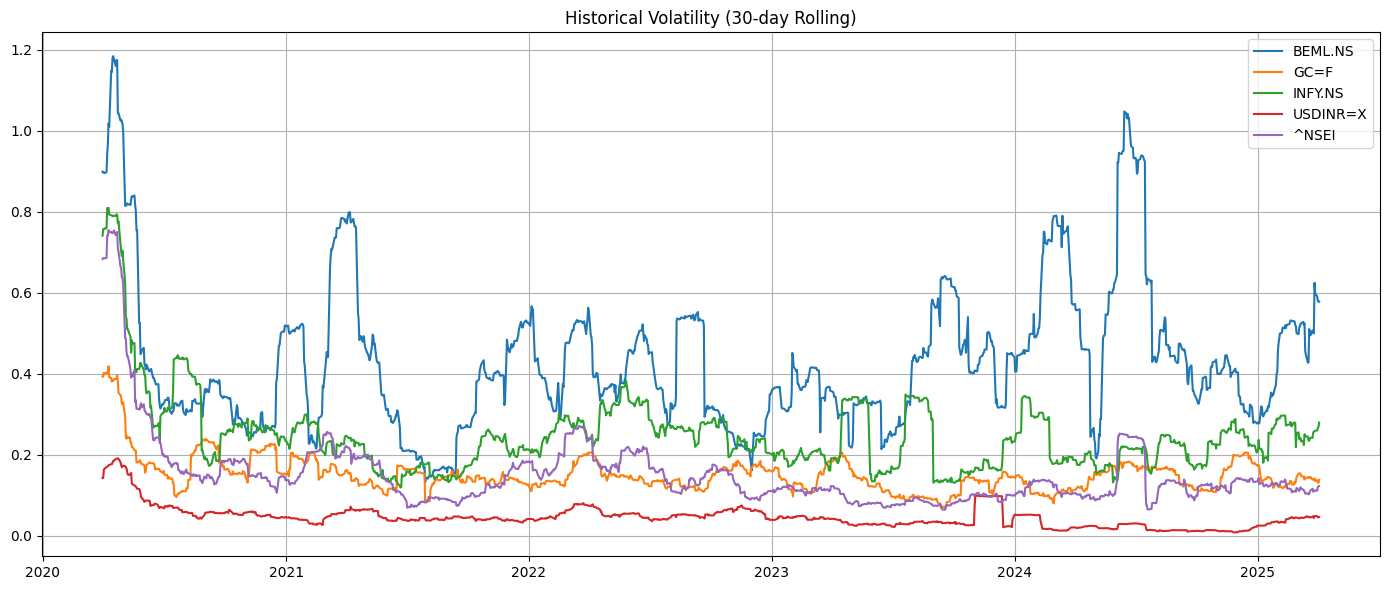

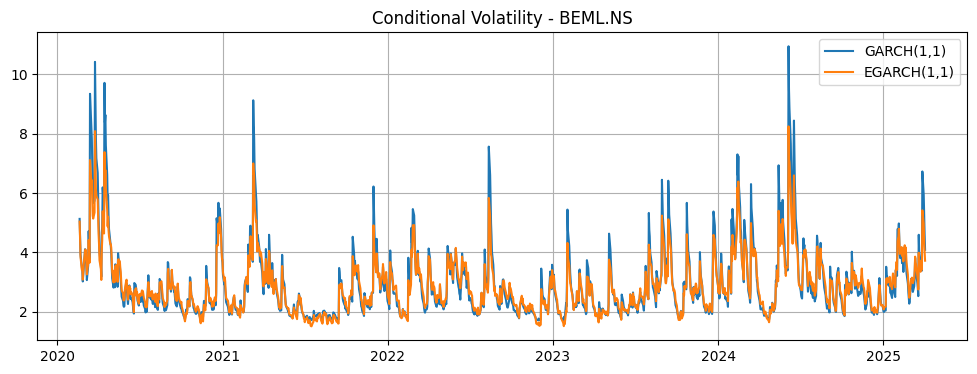

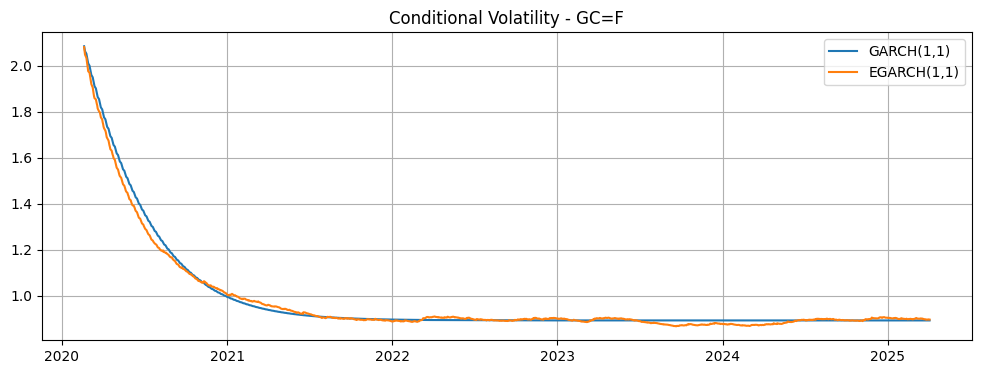

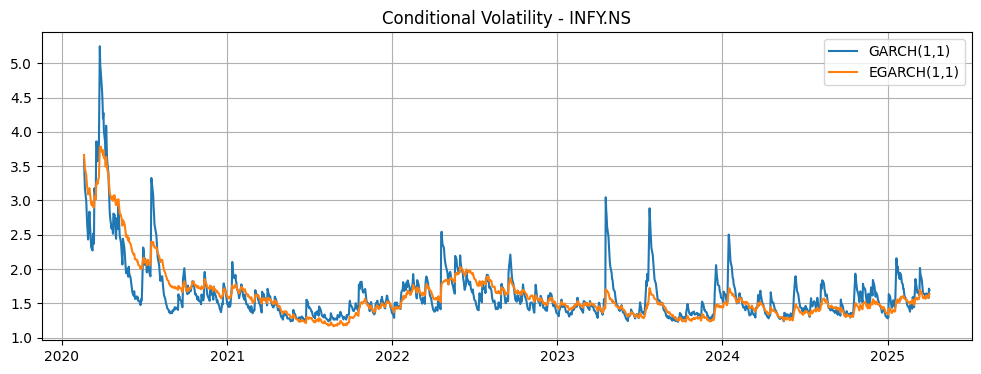

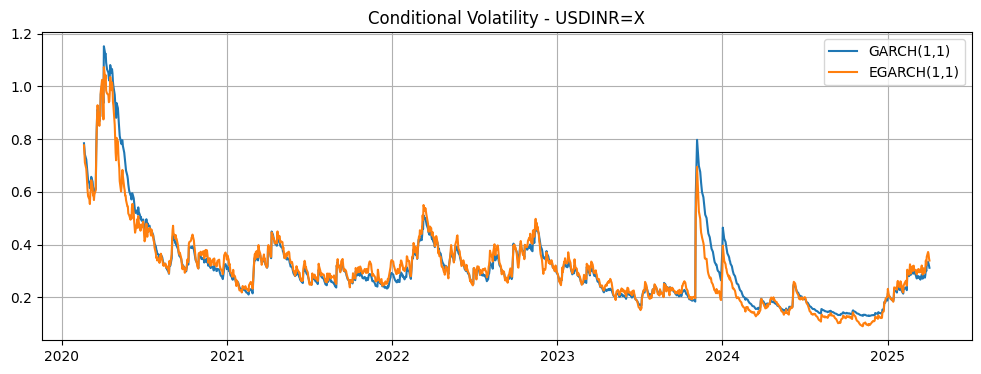

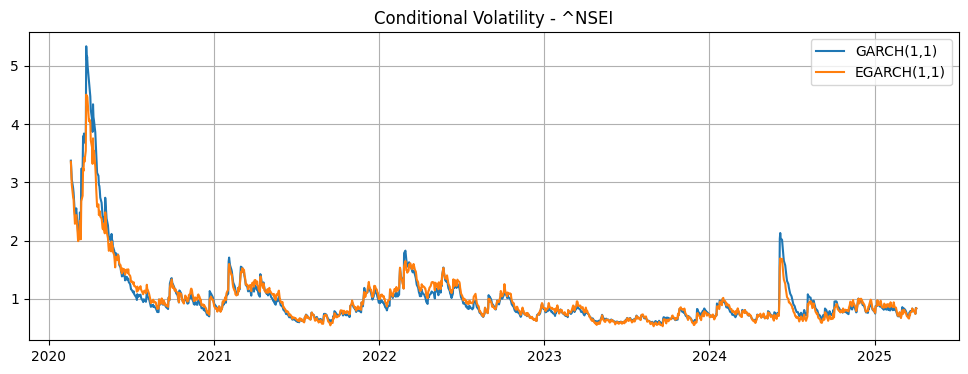

AIC/BIC Comparison:


,Asset,GARCH AIC,GARCH BIC,EGARCH AIC,EGARCH BIC
0,BEML.NS,6529.976829,6550.775543,6521.043795,6541.842508
1,GC=F,3704.554867,3725.353581,3702.890648,3723.689361
2,INFY.NS,5058.683856,5079.482570,5046.451748,5067.250461
3,USDINR=X,453.959213,474.757926,405.806486,426.605200
4,^NSEI,3580.427993,3601.226707,3597.205728,3618.004441



30-Day Average Forecasted Volatility:


,Asset,Forecast Vol (GARCH),Forecast Vol (EGARCH)
0,BEML.NS,3.894571,3.696018
1,GC=F,0.893132,0.898638
2,INFY.NS,1.758922,1.730608
3,USDINR=X,0.309434,0.353237
4,^NSEI,0.841036,0.914727


In [ ]:

!pip install yfinance arch --quiet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from arch import arch_model
import warnings
warnings.filterwarnings('ignore')



rolling_window = 30
hist_vol = log_returns.rolling(window=rolling_window).std() * np.sqrt(252)

plt.figure(figsize=(14, 6))
for col in hist_vol.columns:
    plt.plot(hist_vol[col], label=col)
plt.title('Historical Volatility (30-day Rolling)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# GARCH and EGARCH Modeling
assets = log_returns.columns
garch_results = {}
forecast_horizon = 30

for asset in assets:
    series = log_returns[asset].dropna() * 100

    # GARCH(1,1) Model
    model_garch = arch_model(series, vol='GARCH', p=1, q=1, mean='Constant', rescale=False)
    res_garch = model_garch.fit(disp='off')

    # EGARCH(1,1) Model
    model_egarch = arch_model(series, vol='EGARCH', p=1, q=1, mean='Constant', rescale=False)
    res_egarch = model_egarch.fit(disp='off')

    garch_results[asset] = {
        'GARCH': res_garch,
        'EGARCH': res_egarch,
        'Forecast_GARCH': res_garch.forecast(horizon=forecast_horizon, method='simulation').variance.iloc[-1].values,
        'Forecast_EGARCH': res_egarch.forecast(horizon=forecast_horizon, method='simulation').variance.iloc[-1].values
    }

    # Plot conditional volatilities
    plt.figure(figsize=(12, 4))
    plt.plot(res_garch.conditional_volatility, label='GARCH(1,1)')
    plt.plot(res_egarch.conditional_volatility, label='EGARCH(1,1)')
    plt.title(f"Conditional Volatility - {asset}")
    plt.legend()
    plt.grid(True)
    plt.show()

# AIC/BIC Comparison Table
comparison_table = []
for asset in garch_results:
    comparison_table.append([
        asset,
        garch_results[asset]['GARCH'].aic,
        garch_results[asset]['GARCH'].bic,
        garch_results[asset]['EGARCH'].aic,
        garch_results[asset]['EGARCH'].bic
    ])

comp_df = pd.DataFrame(comparison_table, columns=['Asset', 'GARCH AIC', 'GARCH BIC', 'EGARCH AIC', 'EGARCH BIC'])
print("AIC/BIC Comparison:")
display(comp_df)

# Forecasted Volatility Table
forecast_table = []
for asset in garch_results:
    forecast_table.append([
        asset,
        np.sqrt(garch_results[asset]['Forecast_GARCH'].mean()),
        np.sqrt(garch_results[asset]['Forecast_EGARCH'].mean())
    ])

forecast_df = pd.DataFrame(forecast_table, columns=['Asset', 'Forecast Vol (GARCH)', 'Forecast Vol (EGARCH)'])
print("\n30-Day Average Forecasted Volatility:")
display(forecast_df)



Step 4: Value at Risk (VaR) Estimation

In [ ]:
import numpy as np
from scipy.stats import norm
import pandas as pd
weights = np.array([0.2,0.2,0.2,0.2,0.2])  # Equal weights for 5 assets
portfolio_log_returns = (log_returns * weights).sum(axis=1)  # Weighted sum


# 1. VARIANCE-COVARIANCE METHOD (Parametric VaR)

def var_variance_covariance(portfolio_log_returns, confidence_level=0.95):
    """Parametric VaR using portfolio's log return distribution."""
    mean = np.mean(portfolio_log_returns)
    std_dev = np.std(portfolio_log_returns)
    z_score = norm.ppf(1 - confidence_level)  # Critical value for confidence level
    var_log = -(mean + z_score * std_dev)    # VaR in log-return terms
    return np.exp(var_log) - 1               # Convert to simple return (% loss)


# 2. HISTORICAL SIMULATION

def var_historical_simulation(portfolio_log_returns, confidence_level=0.95):
    """Non-parametric VaR using historical portfolio returns."""
    sorted_returns = np.sort(portfolio_log_returns)  # Sort worst to best
    index = int((1 - confidence_level) * len(sorted_returns))
    var_log = -sorted_returns[index]  # VaR in log-return terms
    return np.exp(var_log) - 1       # Convert to simple return


# 3. MONTE CARLO SIMULATION

def var_monte_carlo(portfolio_log_returns, confidence_level=0.95, num_simulations=10000):
    """Monte Carlo VaR using portfolio's return distribution."""
    mean = np.mean(portfolio_log_returns)
    std_dev = np.std(portfolio_log_returns)
    simulated_log_returns = np.random.normal(mean, std_dev, num_simulations)
    simulated_log_returns_sorted = np.sort(simulated_log_returns)
    index = int((1 - confidence_level) * num_simulations)
    var_log = -simulated_log_returns_sorted[index]
    return np.exp(var_log) - 1


# CALCULATING VaR FOR ALL METHODS/TIME HORIZONS

confidence_levels = [0.95, 0.99]
time_horizons = [1, 10]  # 1-day and 10-day VaR

# Storeing results in a DataFrame
results = []
for cl in confidence_levels:
    for horizon in time_horizons:
        # Variance-Covariance
        var_vc_1day = var_variance_covariance(portfolio_log_returns, cl)
        var_vc = 1 - (1 - var_vc_1day)**horizon  # Scale to multi-day

        # Historical Simulation
        var_hs_1day = var_historical_simulation(portfolio_log_returns, cl)
        var_hs = 1 - (1 - var_hs_1day)**horizon

        # Monte Carlo
        var_mc_1day = var_monte_carlo(portfolio_log_returns, cl)
        var_mc = 1 - (1 - var_mc_1day)**horizon

        results.append({
            'Method': 'Variance-Covariance',
            'Confidence Level': f'{int(cl*100)}%',
            'Time Horizon': f'{horizon}-day',
            'VaR': var_vc
        })
        results.append({
            'Method': 'Historical Simulation',
            'Confidence Level': f'{int(cl*100)}%',
            'Time Horizon': f'{horizon}-day',
            'VaR': var_hs
        })
        results.append({
            'Method': 'Monte Carlo',
            'Confidence Level': f'{int(cl*100)}%',
            'Time Horizon': f'{horizon}-day',
            'VaR': var_mc
        })

# Converting to DataFrame and pivot for clean display
var_results = pd.DataFrame(results)
var_table = var_results.pivot_table(
    index=['Method', 'Confidence Level'],
    columns='Time Horizon',
    values='VaR'
)

print("PORTFOLIO VALUE AT RISK (VaR) RESULTS")
print("-------------------------------------")
print("Note: All values represent % loss (e.g., 0.05 = 5% loss)")
print(var_table)

PORTFOLIO VALUE AT RISK (VaR) RESULTS
-------------------------------------
Note: All values represent % loss (e.g., 0.05 = 5% loss)
Time Horizon                               1-day    10-day
Method                Confidence Level                    
Historical Simulation 95%               0.012730  0.120249
                      99%               0.026761  0.237580
Monte Carlo           95%               0.014888  0.136662
                      99%               0.022343  0.192942
Variance-Covariance   95%               0.014941  0.139754
                      99%               0.021433  0.194796


Step 5: Backtesting & Model Validation

In [ ]:
# prompt:  Backtesting & Model Validation
# Backtest your 1-day 99% VaR using at least 250 historical observations.
# Use:
# Kupiec Test
# Christoffersen Test
# Ljung-Box test on residuals (for GARCH models)
# Discuss:
# Number of exceptions
# Interpretation of p-values

import numpy as np
from scipy.stats import chi2

# Assuming 'portfolio_log_returns' is your portfolio log returns data
# and you've calculated 1-day 99% VaR using one of the methods above.

# Let's use the historical simulation method for this example:
var_99 = var_historical_simulation(portfolio_log_returns, confidence_level=0.99)

# Backtesting with 250 historical observations (adjust as needed)
num_observations = 250
returns_for_backtest = portfolio_log_returns[-num_observations:]
exceptions = (returns_for_backtest < -var_99).sum()
print(f"Number of exceptions: {exceptions}")


# Kupiec Test
# H0: The model is accurate, meaning the number of exceptions is consistent with the VaR model
# Expected number of exceptions
expected_exceptions = num_observations * (1-0.99)
LR_Kupiec = 2 * (exceptions * np.log(exceptions / expected_exceptions) + (num_observations - exceptions) * np.log((num_observations - exceptions)/(num_observations-expected_exceptions)) )

#p-value
p_val_kupiec = chi2.sf(LR_Kupiec,1)
print(f"Kupiec LR Statistic: {LR_Kupiec:.4f}")
print(f"Kupiec p-value: {p_val_kupiec:.4f}")
# Interpretation (example)
if p_val_kupiec < 0.05:
    print("Kupiec Test: Reject the null hypothesis. The model is not accurate.")
else:
    print("Kupiec Test: Fail to reject the null hypothesis.")


#Further tests (requires more complex calculations and may need additional libraries)
# Christoffersen Test  (requires a sequence of hits and misses from the backtesting)
#Ljung-Box test (only relevant for GARCH model residuals)

#Note:
# The Ljung-Box test is suitable for assessing whether a time series has any autocorrelation of a given order.
#The tests' p-values provide evidence against the null hypothesis. A p-value less than the significance level (e.g., 0.05) suggests strong evidence against the null, leading to rejection.



Number of exceptions: 2
Kupiec LR Statistic: 0.1084
Kupiec p-value: 0.7419
Kupiec Test: Fail to reject the null hypothesis.


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2
from statsmodels.stats.diagnostic import acorr_ljungbox

# ---------- Christoffersen Test (Conditional Coverage) ----------
def christoffersen_test(returns, var_series, alpha=0.01):
    """
    Christoffersen Test for Independence of VaR exceptions.
    """
    exceptions = (returns < -var_series).astype(int)
    T00 = T01 = T10 = T11 = 0

    for i in range(1, len(exceptions)):
        if exceptions[i-1] == 0 and exceptions[i] == 0:
            T00 += 1
        elif exceptions[i-1] == 0 and exceptions[i] == 1:
            T01 += 1
        elif exceptions[i-1] == 1 and exceptions[i] == 0:
            T10 += 1
        elif exceptions[i-1] == 1 and exceptions[i] == 1:
            T11 += 1

    pi_01 = T01 / (T00 + T01) if (T00 + T01) > 0 else 0.00001
    pi_11 = T11 / (T10 + T11) if (T10 + T11) > 0 else 0.00001
    pi = (T01 + T11) / (T00 + T01 + T10 + T11)

    # Likelihoods
    L_uncond = ((1 - alpha) ** (T00 + T10)) * (alpha ** (T01 + T11))
    L_cond = ((1 - pi_01) ** T00) * (pi_01 ** T01) * ((1 - pi_11) ** T10) * (pi_11 ** T11)

    LR_cc = -2 * (np.log(L_uncond) - np.log(L_cond))
    p_value = chi2.sf(LR_cc, 1)

    print("\nChristoffersen Test (Independence of exceptions)")
    print("-----------------------------------------------")
    print(f"LR_cc Statistic: {LR_cc:.4f}")
    print(f"p-value: {p_value:.4f}")
    if p_value < 0.05:
        print("Result: Reject H0 – Exceptions are NOT independent.")
    else:
        print("Result: Fail to reject H0 – Exceptions appear independent.")

    return p_value


In [ ]:
# Use the same 1-day 99% VaR from historical method as before
var_99 = var_historical_simulation(portfolio_log_returns, confidence_level=0.99)

# Use last 250 days for validation
returns_250 = portfolio_log_returns[-250:]
var_series = np.full_like(returns_250, fill_value=var_99)  # Constant VaR

christoffersen_test(returns_250, var_series, alpha=0.01)



Christoffersen Test (Independence of exceptions)
-----------------------------------------------
LR_cc Statistic: 0.1368
p-value: 0.7115
Result: Fail to reject H0 – Exceptions appear independent.


np.float64(0.7114628024430599)

Ljung box test

In [ ]:
from arch import arch_model

# Fit a GARCH model on your portfolio log returns
garch_model = arch_model(portfolio_log_returns, vol='GARCH', p=1, q=1, rescale=False)
garch_result = garch_model.fit(disp='off')

# Get residuals
residuals = garch_result.resid / garch_result.conditional_volatility

# Ljung-Box test
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("\nLjung-Box Test on GARCH Residuals")
print("----------------------------------")
print(lb_test)



Ljung-Box Test on GARCH Residuals
----------------------------------
     lb_stat  lb_pvalue
10  9.623023   0.474165


Step 6: Option Pricing & Greek Sensitivities

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf
import datetime

# Step 1: Download latest data for INFY
ticker = 'INFY.NS'
spot_data = yf.download(ticker, start='2024-01-01', end='2025-04-01')['Close']

# Check if data was downloaded successfully
if spot_data.empty:
    print("Error: No data found for the ticker.")
else:
    S0 = spot_data.iloc[-1]  # Last available price as of the most recent date
    S0_value = S0.values[0]  # Extract the scalar value
    print(f"Spot Price (S0): {S0_value:.2f}")

    # Step 2: Parameters
    mu = 0.12             # Assumed drift
    r = 0.07              # Risk-free rate
    sigma = 0.25          # Estimated/assumed volatility
    T = (datetime.date(2025, 4, 24) - datetime.date(2025, 4, 1)).days / 365  # Time to maturity
    K = S0_value          # At-the-money
    n_paths = 10000
    n_steps = 50
    dt = 1

    # Step 3: Simulate GBM paths
    np.random.seed(42)
    paths = np.zeros((n_steps + 1, n_paths))
    paths[0] = S0_value
    for t in range(1, n_steps + 1):
        z = np.random.standard_normal(n_paths)
        paths[t] = paths[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

    S_T = paths[-1]
    call_payoff = np.maximum(S_T - K, 0)
    put_payoff = np.maximum(K - S_T, 0)
    call_price = np.exp(-r * T) * np.mean(call_payoff)
    put_price = np.exp(-r * T) * np.mean(put_payoff)

    print(f"European Call Option Price: {call_price:.2f}")
    print(f"European Put Option Price: {put_price:.2f}")

    # Step 4: Greeks via Finite Differences

    def simulate_call_price(S_init, K, sigma_val=sigma, T_val=T):
        dt_val = T_val / n_steps
        paths = np.zeros((n_steps + 1, n_paths))
        paths[0] = S_init
        for t in range(1, n_steps + 1):
            z = np.random.standard_normal(n_paths)
            paths[t] = paths[t-1] * np.exp((r - 0.5 * sigma_val**2) * dt_val + sigma_val * np.sqrt(dt_val) * z)
        S_T = paths[-1]
        call_payoff = np.maximum(S_T - K, 0)
        return np.exp(-r * T_val) * np.mean(call_payoff)

    # Delta and Gamma
    eps = 1.0
    call_up = simulate_call_price(S0_value + eps, K)
    call_down = simulate_call_price(S0_value - eps, K)

    delta = (call_up - call_down) / (2 * eps)
    gamma = (call_up - 2 * call_price + call_down) / (eps ** 2)

    # Vega
    sigma_bump = 0.001  # Smaller bump for Vega
    call_vega = simulate_call_price(S0_value, K, sigma + sigma_bump)
    vega = (call_vega - call_price) / sigma_bump

    # Theta (1-day time decay)
    T_short = T - dt # Smaller time decay for Theta
    call_theta = simulate_call_price(S0_value, K, sigma, T_short)
    theta = (call_theta - call_price) / (-dt)

    print(f"Delta: {delta:.4f}")
    print(f"Gamma: {gamma:.4f}")
    print(f"Vega: {vega:.4f}")
    print(f"Theta: {theta:.4f}")

    # Step 5: Greeks across strikes
    strikes = np.linspace(S0_value * 0.8, S0_value * 1.2, 25)
    call_prices = []
    deltas = []

    for strike in strikes:
        price = simulate_call_price(S0_value, strike)
        delta_k = (simulate_call_price(S0_value + eps, strike) - simulate_call_price(S0_value - eps, strike)) / (2 * eps)
        call_prices.append(price)
        deltas.append(delta_k)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(strikes, call_prices, label='Call Price')
    plt.plot(strikes, deltas, label='Delta')
    plt.xlabel("Strike Price")
    plt.ylabel("Value")
    plt.title("Call Price and Delta vs Strike")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



1. Spot Price (S0): 1570.65
This is the current market price of the underlying asset (INFY stock). The value of this price will fluctuate over time, and the options pricing and the Greeks will be influenced by this spot price.

2. European Call Option Price: 42.33
The price of a European call option is 42.33, which means you would have to pay this amount today to hold the right (but not the obligation) to buy INFY at the strike price (which is equal to the spot price in this case) at the maturity date.

This price reflects the potential for the stock price to rise above the strike price (1570.65) by the maturity date.

The call price would increase if the stock price rises further, as the probability of the option expiring in-the-money increases.

3. European Put Option Price: 36.22
The price of a European put option is 36.22, meaning you would pay this amount today to hold the right (but not the obligation) to sell INFY at the strike price (1570.65) at maturity.

This price reflects the potential for the stock price to fall below the strike price.

The put price would increase if the stock price decreases, as the likelihood of the option expiring in-the-money increases.

4. Delta: -0.0369
Delta measures the sensitivity of the option price to changes in the underlying asset's price. For a call option, delta is typically positive, and for a put option, it is negative.

Interpretation: A delta of -0.0369 means that if the spot price increases by 1 unit (1 INR), the price of the put option will decrease by 0.0369 INR.

Risk Exposure: This indicates that the put option's value is negatively correlated with the asset's price. As the price of INFY increases, the value of the put option decreases.

Evolution over time: As time to maturity decreases (i.e., closer to expiration), the delta will become more sensitive to movements in the spot price, especially for options that are near the money or out of the money.

5. Gamma: -1.0528
Gamma measures the rate of change of delta with respect to changes in the underlying asset's price. Gamma tells us how much delta will change if the spot price changes.

Interpretation: A gamma of -1.0528 means that for each 1-unit increase in the spot price, the delta will change by -1.0528 units.

Risk Exposure: This implies that the delta of the put option will become more negative (i.e., the option will decrease in value faster) as the spot price increases.

Evolution over time: As expiration nears, gamma increases for at-the-money options, causing greater sensitivity in delta. This can lead to more significant movements in the option's price as the asset price fluctuates.

6. Vega: 546.1449
Vega measures the sensitivity of the option price to changes in volatility. It tells you how much the price of an option will change when the volatility of the underlying asset changes by 1%.

Interpretation: A vega of 546.1449 means that for every 1% increase in implied volatility, the call option price will increase by 546.14 INR.

Risk Exposure: This shows that the call option is highly sensitive to changes in volatility. If the implied volatility of INFY increases, the value of the call option will increase substantially.

Evolution over time: As expiration approaches, vega decreases for options that are deep in or out of the money, but for at-the-money options, vega is typically highest. Volatility changes have a more significant impact on the option prices when the options are at-the-money or near expiration.

7. Theta: -122577.3389
Theta measures the rate at which an option's price changes as time to maturity decreases. It represents time decay and is typically negative for both call and put options, meaning options lose value as time passes (all else equal).

Interpretation: A theta of -122577.3389 means that the option loses 122,577.34 INR in value for every day that passes, assuming no other changes in the market.

Risk Exposure: This is a very large value, indicating that time decay is having a substantial impact on the price of the option. As expiration approaches, the option's price will erode, particularly for at-the-money options.

Evolution over time: Theta becomes more negative as the option nears expiration, and the rate of decay accelerates, especially for at-the-money options. Options with less time to maturity are more sensitive to time decay.

Greeks Across Different Strikes:
From the code, you have calculated and plotted the call prices and deltas for various strikes between 80% and 120% of the spot price.

Call Prices: The price of the call option generally increases as the strike price decreases (i.e., when the option moves further in-the-money). For out-of-the-money options (higher strikes), the call price is lower, and as you approach the spot price, the call price increases.

Delta: The delta of a call option increases as the strike price approaches the spot price. At-the-money options have a delta closer to 0.5, and out-of-the-money or deep in-the-money options have deltas closer to 0 or 1. For put options, delta is negative, and it becomes more negative as the strike price rises.

Greeks Across Maturities:
Delta: For options with a longer time to maturity, delta becomes less sensitive to small changes in the spot price. As expiration approaches, delta becomes more volatile.

Gamma: For long-dated options, gamma tends to be lower. As expiration nears, gamma increases, and the option becomes more sensitive to small changes in the spot price.

Vega: Vega is highest for options that are at-the-money and with longer time to maturity. As maturity approaches, vega decreases, particularly for out-of-the-money options.

Theta: Theta is smaller for long-dated options. As the option approaches expiration, the impact of time decay accelerates, and theta becomes more negative.

Conclusion on Risk Exposures:
Time decay (Theta) is significant for your options, especially as they near expiration, and is most prominent for at-the-money options.

Volatility (Vega) is another important exposure. For instance, any increase in volatility will lead to significant increases in option prices, particularly for calls.

Price movements (Delta and Gamma): The delta indicates your exposure to price changes. In this case, your put option’s delta is negative, meaning you benefit when the stock price decreases, but your option loses value as the stock price increases. Gamma shows that the sensitivity to price changes is significant.



Step 7
(Diversification hedge)

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download historical prices for hedge asset (Gold ETF - GLD)
ltgiltbees = yf.download('LTGILTBEES.NS', start='2020-01-01', end='2024-12-31')['Close']
ltgiltbees_returns = np.log(ltgiltbees / ltgiltbees.shift(1)).dropna()


# Combine with your existing 5-asset log return DataFrame
log_returns['GLD'] = ltgiltbees_returns

# Correlation matrix
correlation_matrix = log_returns.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Create equal-weight portfolio (original)
original_weights = np.array([0.2]*5 + [0])  # 5 assets + no hedge
portfolio_original = log_returns.dot(original_weights)

# Create hedged portfolio (add 10% weight to Gold, scale others to 90%)
hedge_weights = np.array([0.18]*5 + [0.10])  # Slightly reduce stock exposure
portfolio_hedged = log_returns.dot(hedge_weights)
print(portfolio_hedged)
# Compare risk: standard deviation and historical 1-day 99% VaR
std_original = portfolio_original.std()
std_hedged = portfolio_hedged.std()

var_original = var_historical_simulation(portfolio_original, 0.99)
var_hedged = var_historical_simulation(portfolio_hedged,0.99)
print(var_hedged)

print(f"\nOriginal Portfolio Std Dev: {std_original:.4f}")
print(f"Hedged Portfolio Std Dev: {std_hedged:.4f}")
print(f"Original 1-day 99% VaR: {var_original:.4f}")
print(f"Hedged 1-day 99% VaR: {var_hedged:.4f}")


[*********************100%***********************]  1 of 1 completed

Correlation Matrix:
 Ticker     BEML.NS      GC=F   INFY.NS  USDINR=X     ^NSEI       GLD
Ticker                                                              
BEML.NS   1.000000  0.046152  0.178449 -0.050166  0.410794 -0.034697
GC=F      0.046152  1.000000  0.036773  0.017293  0.035551 -0.117062
INFY.NS   0.178449  0.036773  1.000000 -0.078519  0.612285 -0.058320
USDINR=X -0.050166  0.017293 -0.078519  1.000000 -0.075994 -0.153717
^NSEI     0.410794  0.035551  0.612285 -0.075994  1.000000 -0.024800
GLD      -0.034697 -0.117062 -0.058320 -0.153717 -0.024800  1.000000
Date
2020-02-19    0.004360
2020-02-20   -0.000569
2020-02-21         NaN
2020-02-24   -0.006485
2020-02-25   -0.002534
                ...   
2025-03-28         NaN
2025-03-31         NaN
2025-04-01         NaN
2025-04-02         NaN
2025-04-03         NaN
Length: 1339, dtype: float64
0.02400978404435139

Original Portfolio Std Dev: 0.0096
Hedged Portfolio Std Dev: 0.0086
Original 1-day 99% VaR: 0.0268
Hedged 1-day 99% VaR